# Loading libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

In [2]:
# test.csv doesn't have values for the target variable
# the aim is to predict its failure values
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Check first 5 observations to make sure that the data was read correctly

In [3]:
train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


Check the number of observations and the number of features

In [4]:
print('train.shape: ', train.shape)
print('test.shape: ', test.shape)

train.shape:  (26570, 26)
test.shape:  (20775, 25)


Calculate and visulize a correlation matrix for numeric features

In [5]:
train.corr()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,1.000000,0.004305,-0.741200,0.558881,-0.253626,0.400206,0.000128,-0.005923,0.011313,-0.007001,...,0.001550,-0.029611,0.009524,-0.151220,-0.037559,-0.053744,0.083951,-0.059849,-0.000983,-0.007545
loading,0.004305,1.000000,-0.008208,-0.000756,-0.005578,0.002532,0.000303,-0.005203,-0.011792,-0.005599,...,-0.007751,-0.007525,0.003594,-0.002407,0.006138,0.000120,-0.008087,-0.000633,0.000305,0.129089
attribute_2,-0.741200,-0.008208,1.000000,-0.538697,0.175387,-0.377971,0.030522,0.005849,-0.011797,0.006811,...,-0.000098,-0.004953,0.094038,0.226756,0.049639,0.020921,-0.161242,0.035795,0.004729,0.006337
attribute_3,0.558881,-0.000756,-0.538697,1.000000,-0.370232,0.329233,0.013258,-0.002265,0.015470,-0.004034,...,-0.002295,-0.100845,-0.025434,-0.132060,0.028472,-0.049711,0.187519,-0.061520,-0.001418,-0.019222
measurement_0,-0.253626,-0.005578,0.175387,-0.370232,1.000000,-0.255255,-0.083813,-0.004890,-0.006459,0.003304,...,0.009112,0.032779,0.001878,0.033496,-0.031527,0.021907,-0.055431,0.003025,0.003351,0.009646
measurement_1,0.400206,0.002532,-0.377971,0.329233,-0.255255,1.000000,0.005032,-0.008363,0.001535,-0.005587,...,0.004529,0.011986,-0.035312,-0.084605,0.007523,-0.011471,0.060870,-0.004509,-0.004651,-0.010810
measurement_2,0.000128,0.000303,0.030522,0.013258,-0.083813,0.005032,1.000000,-0.002751,-0.009797,0.000241,...,0.001884,0.018695,-0.003877,-0.001808,0.029145,0.014623,0.000138,0.033088,-0.009596,0.015808
measurement_3,-0.005923,-0.005203,0.005849,-0.002265,-0.004890,-0.008363,-0.002751,1.000000,0.009573,0.009864,...,0.008195,-0.004854,-0.004427,0.002445,0.005893,0.002150,-0.010986,-0.002164,0.080902,0.003577
measurement_4,0.011313,-0.011792,-0.011797,0.015470,-0.006459,0.001535,-0.009797,0.009573,1.000000,0.005113,...,0.009080,-0.012998,-0.002784,-0.002586,-0.002454,-0.001713,-0.004567,0.002929,0.193045,-0.010488
measurement_5,-0.007001,-0.005599,0.006811,-0.004034,0.003304,-0.005587,0.000241,0.009864,0.005113,1.000000,...,-0.003589,0.002170,0.005306,0.000858,-0.009325,0.008720,-0.009101,-0.002996,0.450024,0.018079


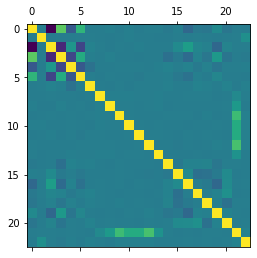

In [6]:
plt.matshow(train.corr())

Features 0 and 3 show strong negative correlation. Regarding the target variable, the correlation is close to zero for most of the variables and very weak for the loading variable.

Check data types

In [7]:
train.dtypes

id                  int64
product_code       object
loading           float64
attribute_0        object
attribute_1        object
attribute_2         int64
attribute_3         int64
measurement_0       int64
measurement_1       int64
measurement_2       int64
measurement_3     float64
measurement_4     float64
measurement_5     float64
measurement_6     float64
measurement_7     float64
measurement_8     float64
measurement_9     float64
measurement_10    float64
measurement_11    float64
measurement_12    float64
measurement_13    float64
measurement_14    float64
measurement_15    float64
measurement_16    float64
measurement_17    float64
failure             int64
dtype: object

# id variable <br>
Check if id us unique for all observations

In [8]:
print('id for the train set is unique:', train.shape[0] == len(train.value_counts('id')))
print('id for the test set is unique:', test.shape[0] == len(test.value_counts('id')))

id for the train set is unique: True
id for the test set is unique: True



Since id is a unique identifier it cannot be used for predicting failures --> remove the id column

In [9]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

# check if the id was dropped
train.columns

Index(['product_code', 'loading', 'attribute_0', 'attribute_1', 'attribute_2',
       'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2',
       'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6',
       'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14',
       'measurement_15', 'measurement_16', 'measurement_17', 'failure'],
      dtype='object')

# product_code <br>
Calculate value counts and draw a histogram for product_code

In [10]:
train.value_counts('product_code')

product_code
C    5765
E    5343
B    5250
D    5112
A    5100
dtype: int64

<AxesSubplot:xlabel='product_code', ylabel='Count'>

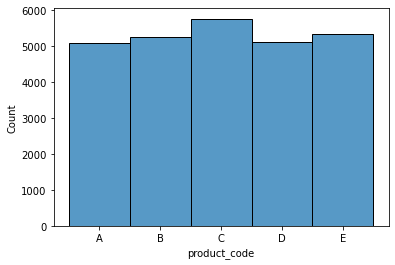

In [11]:
sns.histplot(train['product_code'])

The histogram shows that there are 5 possible values for product_code. All categories have enough observations <br>
<br>
Calculate failure probability for each category of the variable

In [12]:
train.groupby('product_code', axis=0)['failure'].mean()

product_code
A    0.227255
B    0.200381
C    0.211622
D    0.217527
E    0.207000
Name: failure, dtype: float64

Failure probability for different product codes is similar

# loading <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='loading', ylabel='Density'>

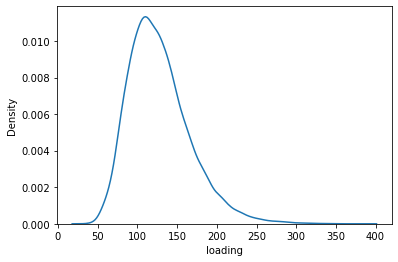

In [13]:
sns.kdeplot(train['loading'])

In [14]:
train['loading'].describe()

count    26320.000000
mean       127.826233
std         39.030020
min         33.160000
25%         99.987500
50%        122.390000
75%        149.152500
max        385.860000
Name: loading, dtype: float64

The plot and calculated statistics show that outstanding and rare values may be present

# Attributes

## attribute_0 <br>
Draw a histogram

<AxesSubplot:xlabel='attribute_0', ylabel='Count'>

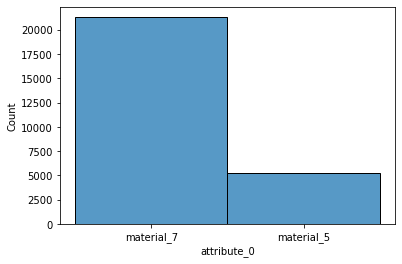

In [15]:
sns.histplot(train['attribute_0'])

The histogram shows that there are 2 possible values for the attribute. All the categories have enough observations<br>
<br>
Calculate failure probability for each category of the variable

In [16]:
train.groupby('attribute_0', axis=0)['failure'].mean()

attribute_0
material_5    0.200381
material_7    0.215619
Name: failure, dtype: float64

Failure probability is similar for both categories of the attribute

## attribute_1 <br>
Draw a histogram and calculate values counts

<AxesSubplot:xlabel='attribute_1', ylabel='Count'>

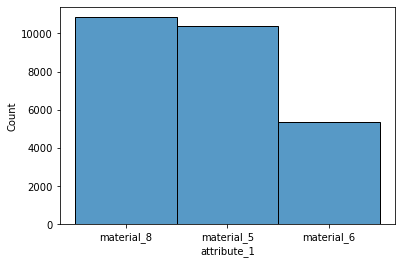

In [17]:
sns.histplot(train['attribute_1'])

In [18]:
train.value_counts('attribute_1')

attribute_1
material_8    10865
material_5    10362
material_6     5343
dtype: int64

There are 3 possible values for the attribute. All categories have enough observations <br>
<br>
Calculate failure probability for each category

In [19]:
train.groupby('attribute_1')['failure'].mean()

attribute_1
material_5    0.20884
material_6    0.20700
material_8    0.21896
Name: failure, dtype: float64

Failure probability is similar for different attribute categories, but slightly higher for material_8

## attribute_2 <br>
Draw a histogram and count values

<AxesSubplot:xlabel='attribute_2', ylabel='Count'>

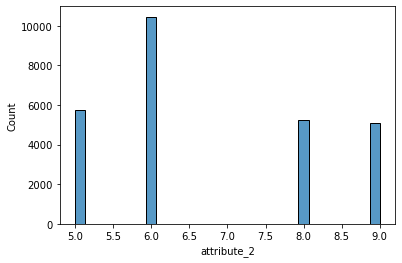

In [20]:
sns.histplot(train['attribute_2'])

In [21]:
train.value_counts('attribute_2', ascending=True)

attribute_2
9     5100
8     5250
5     5765
6    10455
dtype: int64

There are 4 possible values for the attribute. All categories have enough observations <br>
<br>
Calculate failure probability for each category of the variable

In [22]:
train.groupby('attribute_2')['failure'].mean()

attribute_2
5    0.211622
6    0.212147
8    0.200381
9    0.227255
Name: failure, dtype: float64

Failure probability is similar for different attribute_2 values, but the relationship is not linear

Change the dtype from int to object to make it easier for algorithms to learn nonlinear dependencies

In [23]:
train['attribute_2'] = train['attribute_2'].astype(object)
test['attribute_2'] = test['attribute_2'].astype(object)

## attribute_3 <br>
Draw a histogram and calculate value counts

<AxesSubplot:xlabel='attribute_3', ylabel='Count'>

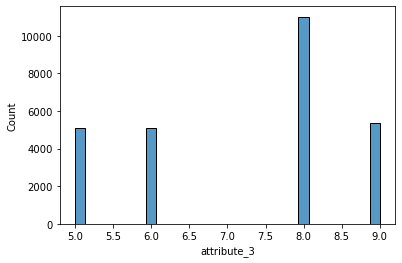

In [24]:
sns.histplot(train['attribute_3'])

In [25]:
train.value_counts('attribute_3', ascending=True)

attribute_3
5     5100
6     5112
9     5343
8    11015
dtype: int64

There are 4 possible values for the attribute. All categories have enough observations<br>
<br>
Calculate failure probability for each category of the variable

In [26]:
train.groupby('attribute_3')['failure'].mean()

attribute_3
5    0.227255
6    0.217527
8    0.206264
9    0.207000
Name: failure, dtype: float64

Change the dtype of attribute_3 from int to object to make it easier for algorithms to learn nonlinear dependencies

In [27]:
train['attribute_3'] = train['attribute_3'].astype(object)
test['attribute_3'] = test['attribute_3'].astype(object)

# Measurements

## measurement_0 <br>
Draw a histogram, calculate statistics and failure probabilities

<AxesSubplot:xlabel='measurement_0', ylabel='Count'>

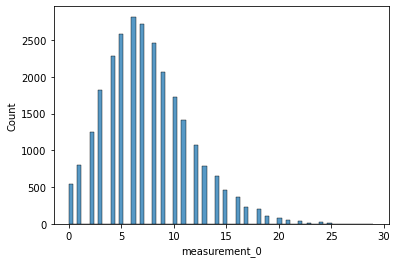

In [28]:
sns.histplot(train['measurement_0'])

In [29]:
train['measurement_0'].describe()

count    26570.000000
mean         7.415883
std          4.116690
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         29.000000
Name: measurement_0, dtype: float64

<AxesSubplot:xlabel='measurement_0', ylabel='failure'>

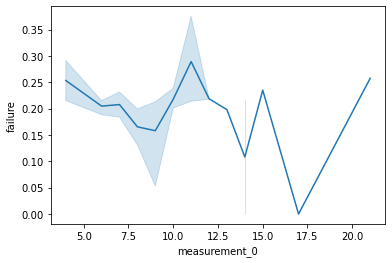

In [30]:
sns.lineplot(x=train['measurement_0'], y=train.groupby('measurement_0')['failure'].mean())

Values of measurement_0 around 11 correspond with the highest failure probability. Low failure probability for 17 may be considered as a result of low number of observations with that value of the variable <br>
It may be useful to group variable's values using its quantiles. This way we'll treat the variable almost like categorical (taking into account nonlinear dependencies), but avoid creating categories with low number of observations

Group values into 10 quantiles and calculate failure probability for each obtained category

In [31]:
train['measurement_0_grouped'] = pd.qcut(train['measurement_0'], 10)
test['measurement_0_grouped'] = pd.cut(
    test['measurement_0'], 
    pd.IntervalIndex(train['measurement_0_grouped'].unique()))
    
train.groupby('measurement_0_grouped')['failure'].mean()

measurement_0_grouped
(-0.001, 3.0]    0.205929
(3.0, 4.0]       0.213596
(4.0, 5.0]       0.212379
(5.0, 6.0]       0.218040
(6.0, 7.0]       0.215520
(7.0, 8.0]       0.207163
(8.0, 9.0]       0.196230
(9.0, 11.0]      0.220663
(11.0, 13.0]     0.211714
(13.0, 29.0]     0.225314
Name: failure, dtype: float64

## measurement_1 <br>
Draw a histogram, calculate statistics and failure probabilities

<AxesSubplot:xlabel='measurement_1', ylabel='Count'>

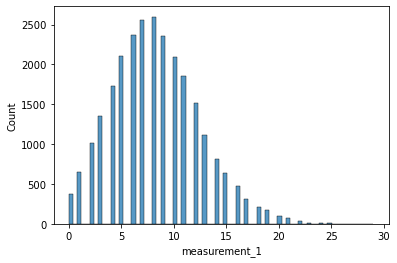

In [32]:
sns.histplot(train['measurement_1'])

In [33]:
train['measurement_1'].describe()

count    26570.000000
mean         8.232518
std          4.199401
min          0.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         29.000000
Name: measurement_1, dtype: float64

<AxesSubplot:xlabel='measurement_1', ylabel='failure'>

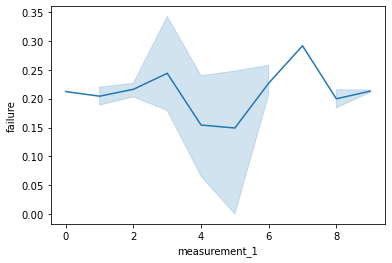

In [34]:
sns.lineplot(x=train['measurement_1'], y=train.groupby('measurement_0')['failure'].mean())

Generally the lowest probability of a failure correnponds with values of measurement_1 around 4-5. As before, we can group variable's values and calculate failure probability for each obtained category

In [35]:
# group values into quantiles
train['measurement_1_grouped'] = pd.qcut(train['measurement_1'], 7)
test['measurement_1_grouped'] = pd.cut(
    test['measurement_1'], 
    pd.IntervalIndex(train['measurement_1_grouped'].unique()))

# calculate failure probability for each quantile
train.groupby('measurement_1_grouped')['failure'].mean()

measurement_1_grouped
(-0.001, 4.0]    0.218951
(4.0, 6.0]       0.215498
(6.0, 7.0]       0.217476
(7.0, 9.0]       0.210335
(9.0, 10.0]      0.220680
(10.0, 13.0]     0.199688
(13.0, 29.0]     0.210691
Name: failure, dtype: float64

## measurement_2 <br>
Draw a histogram, calculate statistics and failure probability

<AxesSubplot:xlabel='measurement_2', ylabel='Count'>

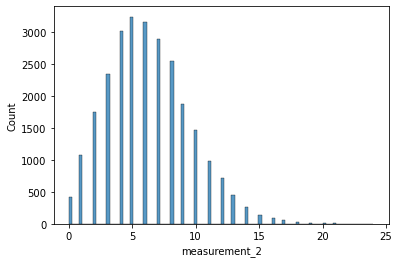

In [36]:
sns.histplot(train['measurement_2'])

In [37]:
train['measurement_2'].describe()

count    26570.000000
mean         6.256568
std          3.309109
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         24.000000
Name: measurement_2, dtype: float64

<AxesSubplot:xlabel='measurement_2', ylabel='failure'>

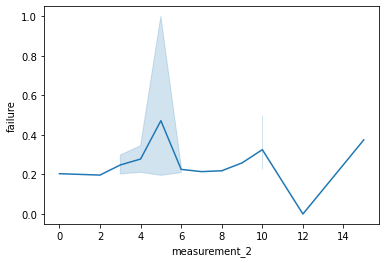

In [38]:
sns.lineplot(x=train['measurement_2'], y=train.groupby('measurement_2')['failure'].mean())

Failure probability is generally the same for all values of measurement_2 excl. 5, 10, 12, 13. As previously, we can group values of the variable using its quantiles

In [39]:
# group values into quantiles
train['measurement_2_grouped'] = pd.qcut(train['measurement_2'], 10)
test['measurement_2_grouped'] = pd.cut(
    test['measurement_2'], 
    pd.IntervalIndex(train['measurement_2_grouped'].unique()))
    
# calculate failure probability for each group
train.groupby('measurement_2_grouped')['failure'].mean()

measurement_2_grouped
(-0.001, 2.0]    0.201050
(2.0, 3.0]       0.219149
(3.0, 4.0]       0.212815
(4.0, 5.0]       0.203949
(5.0, 6.0]       0.201585
(6.0, 7.0]       0.224758
(7.0, 8.0]       0.220606
(8.0, 9.0]       0.214400
(9.0, 11.0]      0.200408
(11.0, 24.0]     0.243109
Name: failure, dtype: float64

For the highest values of measurement_2 (values between 11 and 24) the product reaches the highest failure probability (0.243). <br>
<br>
The dtype of other measurements is float. Because of the continuous type of these features, visualisations of failure probability for different feature values would be unclear. For now, density plots and variables statistics will be provided. The results are summarized at the exploration summary part of the notebook.

## measurement_3 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_3', ylabel='Density'>

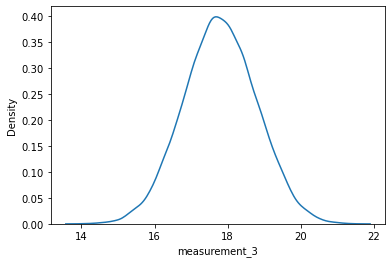

In [40]:
sns.kdeplot(train['measurement_3'])

In [41]:
train['measurement_3'].describe()

count    26189.000000
mean        17.791528
std          1.001200
min         13.968000
25%         17.117000
50%         17.787000
75%         18.469000
max         21.499000
Name: measurement_3, dtype: float64

## measurement_4 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_4', ylabel='Density'>

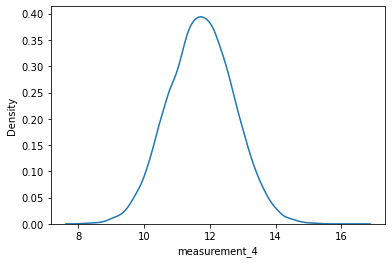

In [42]:
sns.kdeplot(train['measurement_4'])

In [43]:
train['measurement_4'].describe()

count    26032.000000
mean        11.731988
std          0.996085
min          8.008000
25%         11.051000
50%         11.733000
75%         12.410000
max         16.484000
Name: measurement_4, dtype: float64

## measurement_5 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_5', ylabel='Density'>

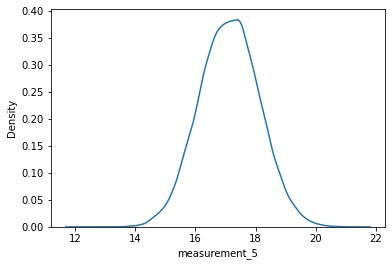

In [44]:
sns.kdeplot(train['measurement_5'])

In [45]:
train['measurement_5'].describe()

count    25894.000000
mean        17.127804
std          0.996414
min         12.073000
25%         16.443000
50%         17.132000
75%         17.805000
max         21.425000
Name: measurement_5, dtype: float64

## measurement_6 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_6', ylabel='Density'>

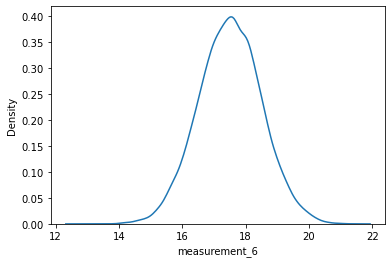

In [46]:
sns.kdeplot(train['measurement_6'])

In [47]:
train['measurement_6'].describe()

count    25774.000000
mean        17.510759
std          0.995980
min         12.715000
25%         16.839000
50%         17.516000
75%         18.178000
max         21.543000
Name: measurement_6, dtype: float64

## measurement_7 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_7', ylabel='Density'>

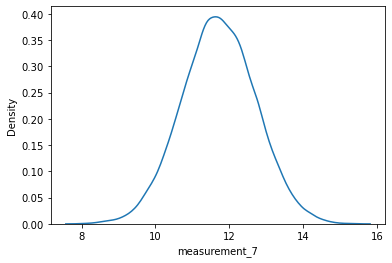

In [48]:
sns.kdeplot(train['measurement_7'])

In [49]:
train['measurement_7'].describe()

count    25633.000000
mean        11.716624
std          1.000836
min          7.968000
25%         11.045000
50%         11.712000
75%         12.391000
max         15.419000
Name: measurement_7, dtype: float64

## measurement_8 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_8', ylabel='Density'>

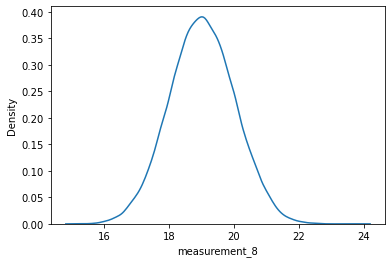

In [50]:
sns.kdeplot(train['measurement_8'])

In [51]:
train['measurement_8'].describe()

count    25522.000000
mean        19.024714
std          1.008591
min         15.217000
25%         18.340250
50%         19.021000
75%         19.708000
max         23.807000
Name: measurement_8, dtype: float64

## measurement_9 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_9', ylabel='Density'>

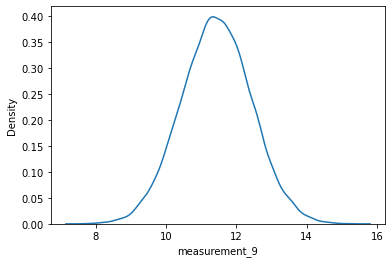

In [52]:
sns.kdeplot(train['measurement_9'])

In [53]:
train['measurement_9'].describe()

count    25343.000000
mean        11.430725
std          0.999137
min          7.537000
25%         10.757000
50%         11.430000
75%         12.102000
max         15.412000
Name: measurement_9, dtype: float64

## measurement_10 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_10', ylabel='Density'>

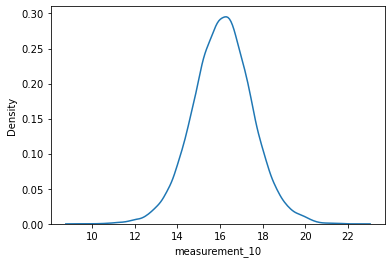

In [54]:
sns.kdeplot(train['measurement_10'])

In [55]:
train['measurement_10'].describe()

count    25270.000000
mean        16.117711
std          1.405978
min          9.323000
25%         15.209000
50%         16.127000
75%         17.025000
max         22.479000
Name: measurement_10, dtype: float64

## measurement_11 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_11', ylabel='Density'>

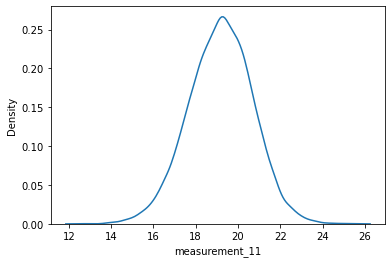

In [56]:
sns.kdeplot(train['measurement_11'])

In [57]:
train['measurement_11'].describe()

count    25102.000000
mean        19.172085
std          1.520785
min         12.461000
25%         18.170000
50%         19.211500
75%         20.207000
max         25.640000
Name: measurement_11, dtype: float64

## measurement_12 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_12', ylabel='Density'>

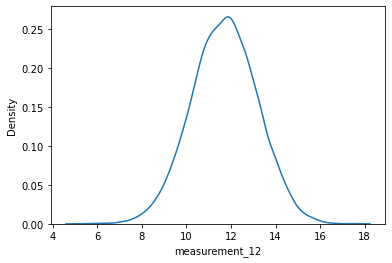

In [58]:
sns.kdeplot(train['measurement_12'])

In [59]:
train['measurement_12'].describe()

count    24969.000000
mean        11.702464
std          1.488838
min          5.167000
25%         10.703000
50%         11.717000
75%         12.709000
max         17.663000
Name: measurement_12, dtype: float64

## measurement_13 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_13', ylabel='Density'>

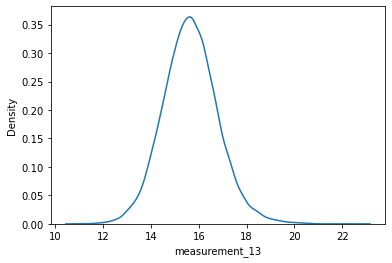

In [60]:
sns.kdeplot(train['measurement_13'])

In [61]:
train['measurement_13'].describe()

count    24796.000000
mean        15.652904
std          1.155247
min         10.890000
25%         14.890000
50%         15.628500
75%         16.374000
max         22.713000
Name: measurement_13, dtype: float64

## measurement_14 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_14', ylabel='Density'>

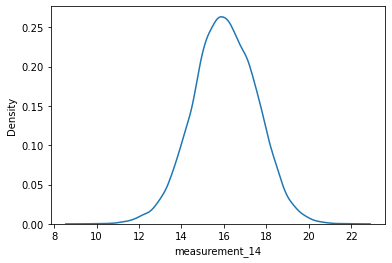

In [62]:
sns.kdeplot(train['measurement_14'])

In [63]:
train['measurement_14'].describe()

count    24696.000000
mean        16.048444
std          1.491923
min          9.140000
25%         15.057000
50%         16.040000
75%         17.082000
max         22.303000
Name: measurement_14, dtype: float64

## measurement_15 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_15', ylabel='Density'>

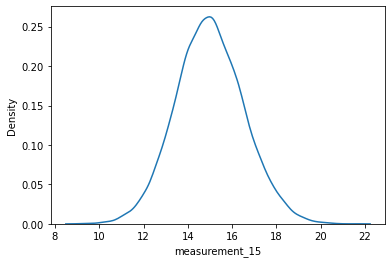

In [64]:
sns.kdeplot(train['measurement_15'])

In [65]:
train['measurement_15'].describe()

count    24561.000000
mean        14.995554
std          1.549226
min          9.104000
25%         13.957000
50%         14.969000
75%         16.018000
max         21.626000
Name: measurement_15, dtype: float64

## measurement_15 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_15', ylabel='Density'>

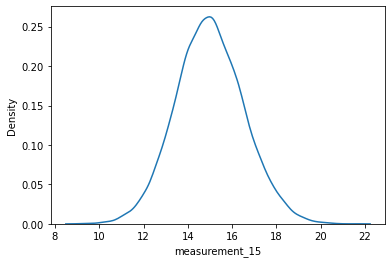

In [66]:
sns.kdeplot(train['measurement_15'])

In [67]:
train['measurement_15'].describe()

count    24561.000000
mean        14.995554
std          1.549226
min          9.104000
25%         13.957000
50%         14.969000
75%         16.018000
max         21.626000
Name: measurement_15, dtype: float64

## measurement_16 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_16', ylabel='Density'>

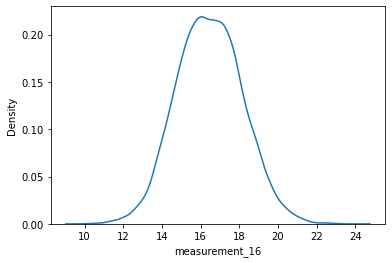

In [68]:
sns.kdeplot(train['measurement_16'])

In [69]:
train['measurement_16'].describe()

count    24460.000000
mean        16.460727
std          1.708935
min          9.701000
25%         15.268000
50%         16.436000
75%         17.628000
max         24.094000
Name: measurement_16, dtype: float64

## measurement_17 <br>
Draw a density plot and calculate statistics

<AxesSubplot:xlabel='measurement_17', ylabel='Density'>

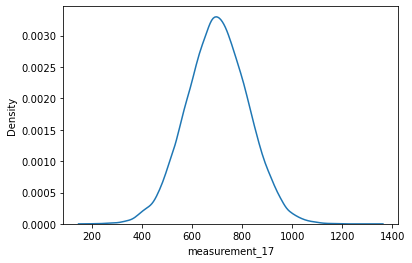

In [70]:
sns.kdeplot(train['measurement_17'])

In [71]:
train['measurement_17'].describe()

count    24286.000000
mean       701.269059
std        123.304161
min        196.787000
25%        618.961500
50%        701.024500
75%        784.090250
max       1312.794000
Name: measurement_17, dtype: float64

# failure <br>
Change dtype of the target variable from int to object to make some functions work properly later

In [72]:
train['failure'] = train['failure'].astype(object)

Draw a histogram for the target variable and calculate probability of a failure a priori

<AxesSubplot:xlabel='failure', ylabel='Count'>

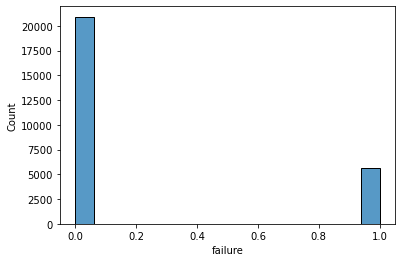

In [73]:
sns.histplot(train['failure'])

In [74]:
print('A priori probability of a failure equals', 
      round(train['failure'].sum() / train.shape[0], 4))

A priori probability of a failure equals 0.2126


For modeling it's more convinient to have a target variable as a separate dataframe or an array

In [75]:
# separate the target variable
target = train['failure']
train.drop('failure', axis=1, inplace=True)

# make sure that it was separated
train.columns

Index(['product_code', 'loading', 'attribute_0', 'attribute_1', 'attribute_2',
       'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2',
       'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6',
       'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14',
       'measurement_15', 'measurement_16', 'measurement_17',
       'measurement_0_grouped', 'measurement_1_grouped',
       'measurement_2_grouped'],
      dtype='object')

# Splitting the data <br>
The test dataframe does not contain labels - we need to predict them. But in order to evaluate performance of models, we need a separate test set. Therefore, the train dataset will be split into 2 separate sets. <br>
<br>
At the begginning we have created categorical features measurement_0_grouped, measurement_1_grouped, measurement_2_grouped using quantilies calculated on the whole dataset. Now this dataset will be split into training and test sets. This way data leakage problem occurs, when evaluating a model on the test set. But we assume that it has a low impact on models performance evaluation and can be ignored. Moreover, in most cases cross-validation will be used to evaluate quality of a model

In [76]:
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state=0)
X_train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,measurement_0_grouped,measurement_1_grouped,measurement_2_grouped
1630,A,107.53,material_7,material_8,9,5,16,2,4,NaN,...,18.014,14.962,16.743,14.487,14.351,15.737,705.885,"(13.0, 29.0]","(-0.001, 4.0]","(3.0, 4.0]"
18030,D,128.99,material_7,material_5,6,6,3,9,5,17.242,...,18.873,11.384,15.002,NaN,19.237,NaN,841.809,"(-0.001, 3.0]","(7.0, 9.0]","(4.0, 5.0]"
26078,E,128.33,material_7,material_6,6,9,4,16,5,16.094,...,19.696,10.480,15.294,16.715,15.292,15.861,632.835,"(3.0, 4.0]","(13.0, 29.0]","(4.0, 5.0]"
19823,D,125.21,material_7,material_5,6,6,11,9,6,16.677,...,21.130,13.625,15.095,15.394,12.846,19.156,643.322,"(9.0, 11.0]","(7.0, 9.0]","(5.0, 6.0]"
15788,C,106.12,material_7,material_8,5,8,5,6,6,16.963,...,17.362,10.523,15.199,17.476,NaN,15.472,545.206,"(4.0, 5.0]","(4.0, 6.0]","(5.0, 6.0]"


# Categorical features 
Since many algorithms don't handle categorical features, we need to present them as one-hot vectors. For now pd.get_dummies() will be used to get more interpretable results (a dataframe with named columns)<br>
<br>
List of categorical features

In [77]:
X_train.columns[[0, 2, 3, 4, 5, 24, 25, 26]]

Index(['product_code', 'attribute_0', 'attribute_1', 'attribute_2',
       'attribute_3', 'measurement_0_grouped', 'measurement_1_grouped',
       'measurement_2_grouped'],
      dtype='object')

In [78]:
# create dummy variables
X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

# check if dummies were created
X_train_dummies.columns

Index(['loading', 'measurement_0', 'measurement_1', 'measurement_2',
       'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6',
       'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14',
       'measurement_15', 'measurement_16', 'measurement_17', 'product_code_A',
       'product_code_B', 'product_code_C', 'product_code_D', 'product_code_E',
       'attribute_0_material_5', 'attribute_0_material_7',
       'attribute_1_material_5', 'attribute_1_material_6',
       'attribute_1_material_8', 'attribute_2_5', 'attribute_2_6',
       'attribute_2_8', 'attribute_2_9', 'attribute_3_5', 'attribute_3_6',
       'attribute_3_8', 'attribute_3_9', 'measurement_0_grouped_(-0.001, 3.0]',
       'measurement_0_grouped_(3.0, 4.0]', 'measurement_0_grouped_(4.0, 5.0]',
       'measurement_0_grouped_(5.0, 6.0]', 'measurement_0_grouped_(6.0, 7.0]',
       'measurement_0_grouped_(7.0, 8.0]', 'm

# Features normalization <br>
Since some algorithms (e.g. KNN) use 'distance' between observations, all numerical features should be standardized or normalized. Most features in the dataset follow the Gaussian distribution, so it's better to use normalization. Moreover, this way we minimize the influence of outliers, which are present in case of some features (for instance loading, measurement_17) <br>
<br> 
List of columns to be normalized

In [79]:
X_train_dummies.columns[[*range(0, 19)]]

Index(['loading', 'measurement_0', 'measurement_1', 'measurement_2',
       'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6',
       'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10',
       'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14',
       'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')

In [80]:
# scale features
transformer = ColumnTransformer(
    [('scaler', StandardScaler(), [*range(0, 19)])],
     remainder='passthrough'
)
X_train_dummies_scaled = transformer.fit_transform(X_train_dummies)
X_test_dummies_scaled = transformer.transform(X_test_dummies)


# ColumnTransformer() returns an array
# In order to make further analysis more interpretable we need to name the features as before
X_train_dummies_scaled = pd.DataFrame(X_train_dummies_scaled, columns=X_train_dummies.columns)
X_test_dummies_scaled = pd.DataFrame(X_test_dummies_scaled, columns=X_test_dummies.columns)

# check if features names were restored
X_train_dummies_scaled.head()

,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,...,"measurement_2_grouped_(-0.001, 2.0]","measurement_2_grouped_(2.0, 3.0]","measurement_2_grouped_(3.0, 4.0]","measurement_2_grouped_(4.0, 5.0]","measurement_2_grouped_(5.0, 6.0]","measurement_2_grouped_(6.0, 7.0]","measurement_2_grouped_(7.0, 8.0]","measurement_2_grouped_(8.0, 9.0]","measurement_2_grouped_(9.0, 11.0]","measurement_2_grouped_(11.0, 24.0]"
0,-0.513603,2.078416,-1.485328,-0.681222,NaN,-0.015593,-0.319033,-0.014153,-0.067520,0.327396,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.036400,-1.070214,0.179974,-0.379065,-0.549359,-0.731627,1.703556,0.598172,-0.121901,-0.066527,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.019484,-0.828012,1.845276,-0.379065,-1.697273,0.577577,-1.657378,-0.286633,1.452140,0.304632,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.060479,0.867404,0.179974,-0.076908,-1.114317,0.677278,0.361192,-0.752161,-0.738225,0.907394,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.549740,-0.585809,-0.533727,-0.076908,-0.828338,0.043825,-1.348916,0.015005,0.087568,-1.010756,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Missing values <br>
Calculate the percentage of missing values for each variable

In [81]:
X_train.isna().sum(axis=0) / X_train.shape[0]

product_code             0.000000
loading                  0.007628
attribute_0              0.000000
attribute_1              0.000000
attribute_2              0.000000
attribute_3              0.000000
measurement_0            0.000000
measurement_1            0.000000
measurement_2            0.000000
measurement_3            0.014101
measurement_4            0.020525
measurement_5            0.025092
measurement_6            0.028604
measurement_7            0.035028
measurement_8            0.039293
measurement_9            0.045516
measurement_10           0.049681
measurement_11           0.053897
measurement_12           0.059166
measurement_13           0.066392
measurement_14           0.070658
measurement_15           0.075676
measurement_16           0.080745
measurement_17           0.085512
measurement_0_grouped    0.000000
measurement_1_grouped    0.000000
measurement_2_grouped    0.000000
dtype: float64

The percentage of missing values was calculated on a dataset with categorical features (before one-hot encoding). As we can see, all features of float dtype have missing values. Missing values do not occur in case of categorical features. It means, that filling missing values after encoding categorical variables is safe. <br>
To fill missing values KNN will be used. Since some algorithms can handle missing values by themselves, separate datasets will be created

In [82]:
# fill missing values
imputer = KNNImputer()
X_train_dummies_scaled_knn = imputer.fit_transform(X_train_dummies_scaled)
X_test_dummies_scaled_knn = imputer.transform(X_test_dummies_scaled)

# restore column names
X_train_dummies_scaled_knn = pd.DataFrame(X_train_dummies_scaled_knn, columns=X_train_dummies_scaled.columns)
X_test_dummies_scaled_knn = pd.DataFrame(X_test_dummies_scaled_knn, columns=X_test_dummies_scaled.columns)

X_train_dummies_scaled_knn.head()

,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,...,"measurement_2_grouped_(-0.001, 2.0]","measurement_2_grouped_(2.0, 3.0]","measurement_2_grouped_(3.0, 4.0]","measurement_2_grouped_(4.0, 5.0]","measurement_2_grouped_(5.0, 6.0]","measurement_2_grouped_(6.0, 7.0]","measurement_2_grouped_(7.0, 8.0]","measurement_2_grouped_(8.0, 9.0]","measurement_2_grouped_(9.0, 11.0]","measurement_2_grouped_(11.0, 24.0]"
0,-0.513603,2.078416,-1.485328,-0.681222,-0.653551,-0.015593,-0.319033,-0.014153,-0.067520,0.327396,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.036400,-1.070214,0.179974,-0.379065,-0.549359,-0.731627,1.703556,0.598172,-0.121901,-0.066527,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.019484,-0.828012,1.845276,-0.379065,-1.697273,0.577577,-1.657378,-0.286633,1.452140,0.304632,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.060479,0.867404,0.179974,-0.076908,-1.114317,0.677278,0.361192,-0.752161,-0.738225,0.907394,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.549740,-0.585809,-0.533727,-0.076908,-0.828338,0.043825,-1.348916,0.015005,0.087568,-1.010756,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Count the number of missing values to make sure, that they were filled

In [83]:
print("Train set missing values count: ", X_train_dummies_scaled_knn.isna().sum().sum())
print("Test set missing values count: ", X_test_dummies_scaled_knn.isna().sum().sum())

Train set missing values count:  0
Test set missing values count:  0


# Exploration summary <br>
Most features in the dataset are numerical. Before normalization, measurements 0, 1, 2 followed gamma distribution, while measurements 3 - 17 followed Gaussian distribution. Standard deviation of measurements 0-2 was about 4, std of measurements 3-9 was about 1, std of measurements 10-16 was about 1.5. <br>
Most features can be considered weak in terms of predicting failure probability. <br>


In [84]:
X_train_dummies.describe()

,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,...,"measurement_2_grouped_(-0.001, 2.0]","measurement_2_grouped_(2.0, 3.0]","measurement_2_grouped_(3.0, 4.0]","measurement_2_grouped_(4.0, 5.0]","measurement_2_grouped_(5.0, 6.0]","measurement_2_grouped_(6.0, 7.0]","measurement_2_grouped_(7.0, 8.0]","measurement_2_grouped_(8.0, 9.0]","measurement_2_grouped_(9.0, 11.0]","measurement_2_grouped_(11.0, 24.0]"
count,19775.000000,19927.000000,19927.000000,19927.000000,19646.000000,19518.000000,19427.000000,19357.000000,19229.000000,19144.000000,...,19927.000000,19927.000000,19927.000000,19927.000000,19927.000000,19927.000000,19927.000000,19927.000000,19927.000000,19927.000000
mean,127.569762,7.418678,8.243489,6.254529,17.791400,11.729484,17.131521,17.504076,11.721046,19.030216,...,0.122597,0.088021,0.113565,0.121644,0.117981,0.107894,0.097707,0.070608,0.091534,0.068450
std,39.019003,4.128883,4.203547,3.309619,1.000101,0.992995,0.995285,0.994595,0.993011,1.010375,...,0.327983,0.283333,0.317290,0.326882,0.322593,0.310254,0.296925,0.256175,0.288374,0.252523
min,33.160000,0.000000,0.000000,0.000000,14.166000,8.008000,12.813000,13.968000,7.973000,15.217000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.830000,4.000000,5.000000,4.000000,17.118000,11.055250,16.454500,16.831000,11.053000,18.344000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,122.120000,7.000000,8.000000,6.000000,17.787000,11.727000,17.138000,17.508000,11.717000,19.028000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,148.990000,10.000000,11.000000,8.000000,18.468000,12.407750,17.804000,18.180000,12.388000,19.711000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,385.860000,29.000000,28.000000,24.000000,21.499000,16.484000,21.425000,21.543000,15.359000,23.807000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Pipeline <br>
To make models building easier, preprocessing steps may be merged into a pipeline

In [85]:
# does not contain one-hot encoding step
preprocessing = Pipeline([
    ('transformer', ColumnTransformer([
        ('scaler', StandardScaler(), [*range(0, 19)])],
         remainder='passthrough')),
    ('imputer', KNNImputer())
])

# Saving data

In [ ]:
X_train.to_csv('data/X_train.csv')
X_test.to_csv('data/X_test.csv')

X_train_dummies.to_csv('data/X_train_dummies.csv')
X_test_dummies.to_csv('data/X_test_dummies.csv')

X_train_dummies_scaled_knn.to_csv('data/X_train_dummies_scaled_knn.csv')
X_test_dummies_scaled_knn.to_csv('data/X_test_dummies_scaled_knn.csv')

y_train.to_csv('data/y_train.csv')
y_test.to_csv('data/y_test.csv')